<a href="https://colab.research.google.com/github/raviintechis/Google_Stock_Price_Prediction_LSTM/blob/main/Google_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PART -I DATA PREPROCESSING

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.shape

(1258, 6)

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set.shape

(1258, 1)

In [7]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled.shape

(1258, 1)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
# Creating a data structure with 60 timesteps and 1 outout

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##PART - II : Building LSTM Model

In [13]:
# importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
# initialize the RNN
regressor = Sequential()

In [15]:
#Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [16]:
#Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [17]:
#Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [18]:
#Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 132ms/step - loss: 0.0433
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0041
Epoch 13/100

## PART - III: Making the predictions and visualizing results

In [22]:
#Getting real stcok price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,  (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

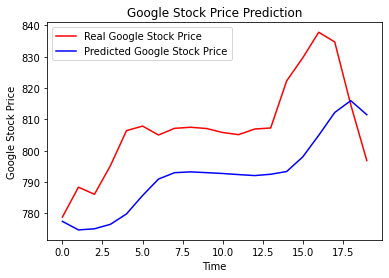

In [25]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()